In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [32]:
df['country_only'] = df['customer_country'].apply(lambda x: 'e-mail' if pd.notnull(x) and '@' in x else (x.split('/')[-1].strip() if pd.notnull(x) and '//' not in x else np.nan))
df_country_only = df.dropna(subset=['country_only'])

converted_counts_country_only = df_country_only.groupby('country_only')['is_converted'].sum().reset_index()
total_counts_country_only = df_country_only.groupby('country_only').size().reset_index(name='total_counts')

ratio_df_country_only = pd.merge(converted_counts_country_only, total_counts_country_only, on='country_only', how='left')
ratio_df_country_only['conversion_ratio'] = ratio_df_country_only['is_converted'] / ratio_df_country_only['total_counts']

for index, row in ratio_df_country_only.iterrows():
    total = int(row['total_counts'])
    converted = int(row['is_converted'])
    ratio = row['conversion_ratio'] * 100
    # print(f"{row['country_only']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

top10_countries = ratio_df_country_only.sort_values(by='total_counts', ascending=False).head(10)

In [33]:
for index, row in top10_countries.iterrows():
    total = int(row['total_counts'])
    converted = int(row['is_converted'])
    ratio = (converted / total) * 100
    print(f"{row['country_only']} 별 전체 갯수: {total}, is_converted 갯수: {converted}, is_converted 비율: {ratio:.2f}%")


India 별 전체 갯수: 13804, is_converted 갯수: 1032, is_converted 비율: 7.48%
Brazil 별 전체 갯수: 8155, is_converted 갯수: 508, is_converted 비율: 6.23%
United States 별 전체 갯수: 2826, is_converted 갯수: 692, is_converted 비율: 24.49%
Mexico 별 전체 갯수: 2310, is_converted 갯수: 124, is_converted 비율: 5.37%
Philippines 별 전체 갯수: 1859, is_converted 갯수: 184, is_converted 비율: 9.90%
Colombia 별 전체 갯수: 1515, is_converted 갯수: 62, is_converted 비율: 4.09%
 별 전체 갯수: 1306, is_converted 갯수: 61, is_converted 비율: 4.67%
Chile 별 전체 갯수: 1057, is_converted 갯수: 56, is_converted 비율: 5.30%
Peru 별 전체 갯수: 999, is_converted 갯수: 36, is_converted 비율: 3.60%
U.A.E 별 전체 갯수: 954, is_converted 갯수: 145, is_converted 비율: 15.20%


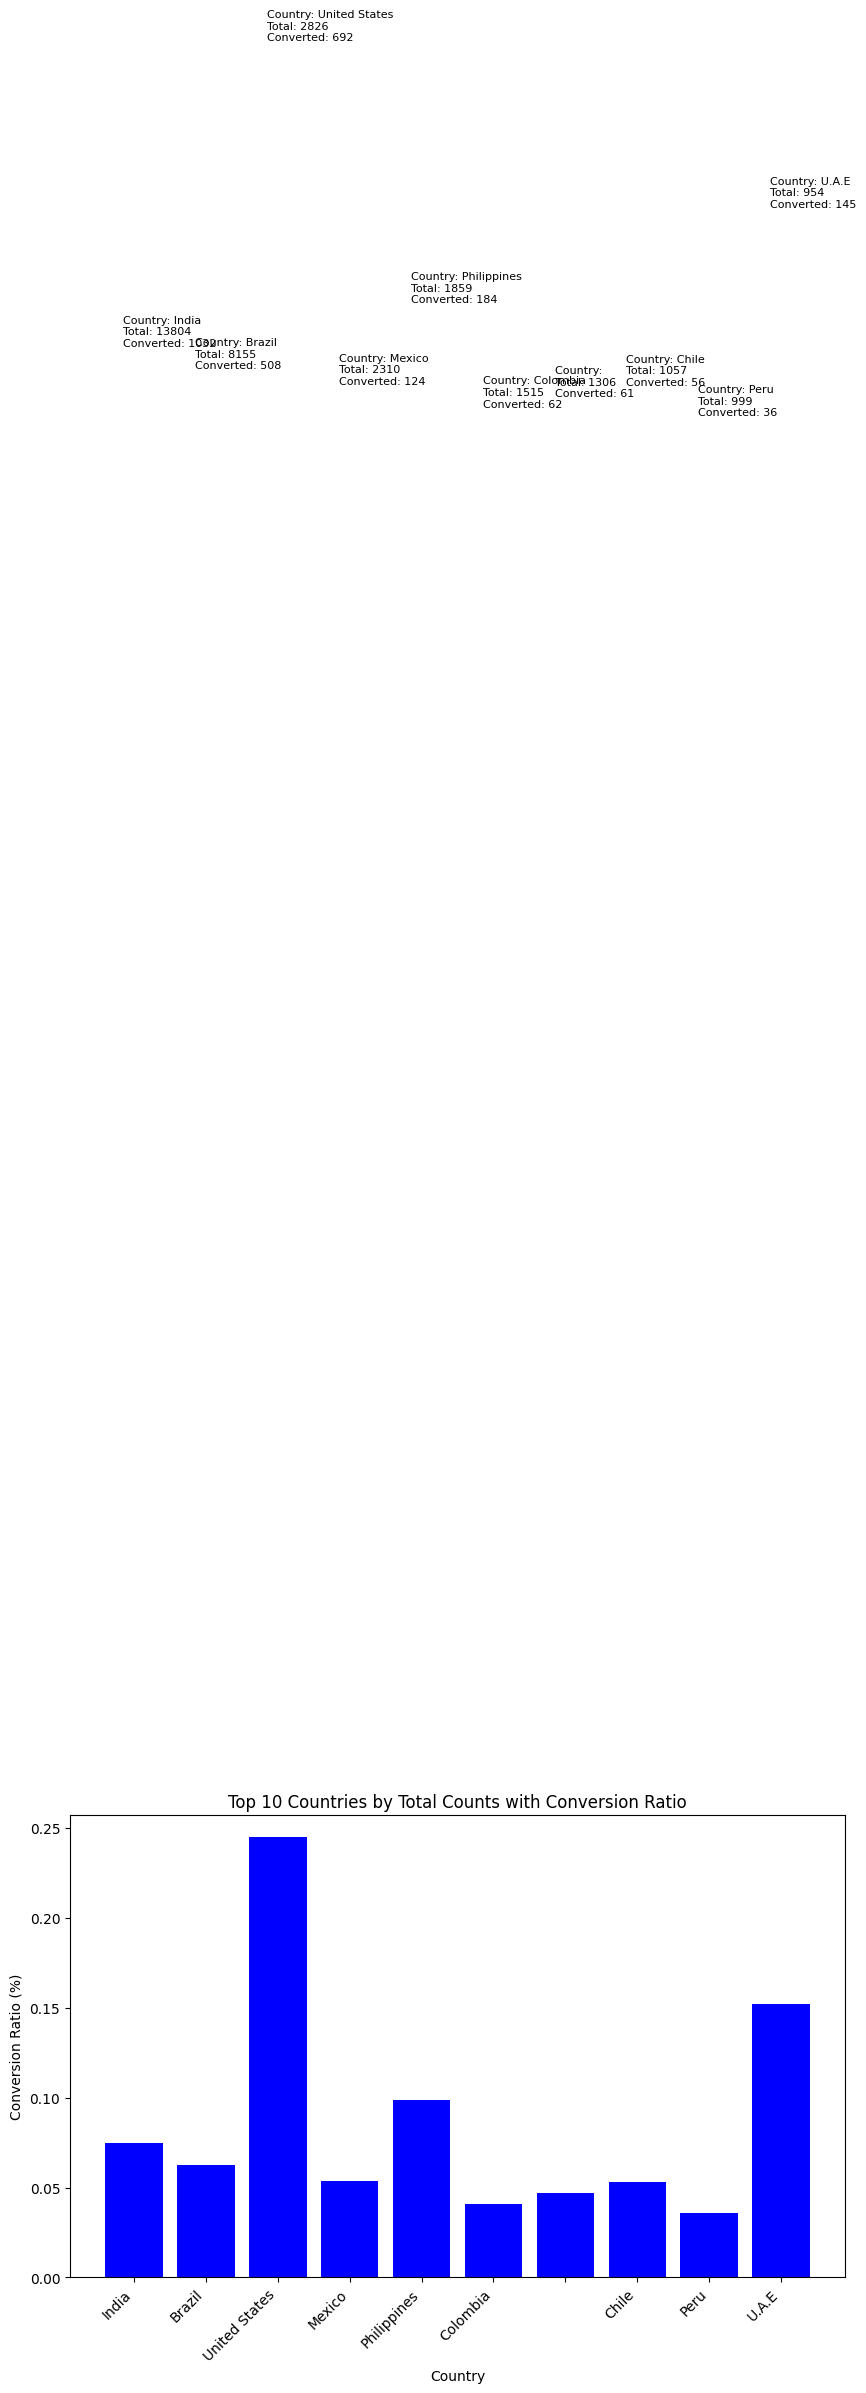

In [34]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_countries['country_only'], top10_countries['conversion_ratio'], color='blue')

for bar, total, converted, country in zip(bars, top10_countries['total_counts'], top10_countries['is_converted'], top10_countries['country_only']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'Country: {country}\nTotal: {total}\nConverted: {converted}', fontsize=8, color='black')

plt.xlabel('Country')
plt.ylabel('Conversion Ratio (%)')
plt.title('Top 10 Countries by Total Counts with Conversion Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()